In [1]:
import os
from astropy.table import Table, Column  ## to use astropy tables as our data storage and interaction format
import numpy as np
from stingray.events import EventList
from stingray.lightcurve import Lightcurve

/home/astevens/anaconda3/envs/j0243/lib/python3.9/site-packages/stingray/utils.py:27: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/home/astevens/anaconda3/envs/j0243/lib/python3.9/site-packages/stingray/fourier.py:18: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/home/astevens/anaconda3/envs/j0243/lib/python3.9/site-packages/stingray/crosscorrelation.py:9: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/home/astevens/anaconda3/envs/j0243/lib/python3.9/site-packages/stingray/bispectrum.py:11: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")


In [2]:
homedir = os.path.expanduser('~')
obj_name = "Swift_J0243.6+6124"
obj_prefix = "J0243"
exe_dir = os.getcwd()
data_dir = homedir + '/Reduced_data/%s/1050390113/xti/event_cl/' % obj_name
data_file = data_dir + 'obs113_0mpu7_cl_no14-34-54.evt'
assert os.path.isfile(data_file), 'Data file does not exist.'

In [3]:
datatab = Table.read(data_file, format='fits', hdu=1)
print(len(datatab))
energy_mask = (datatab['PI'] >= 20) & (datatab['PI'] <= 1200)
datatab = datatab[energy_mask]
print(len(datatab))

91491444
91482305


In [4]:
gtitab = Table.read(data_file, format='fits', hdu=2)
print(gtitab)
gtis = [[i,j] for i,j in zip(gtitab['START'], gtitab['STOP'])]

      START               STOP       
        s                  s         
------------------ ------------------
       120970497.0        120971065.0
       120971070.0        120971082.0
       120976288.0        120976642.0
       120992530.0        120992531.0
       120992533.0 120993385.50219412
120993385.50267753 120993419.48035495
120993419.48269826        120993582.0
       121009194.0        121010262.0
       121014748.0        121015685.0
       121015688.0        121015701.0
[[120970497.0, 120971065.0], [120971070.0, 120971082.0], [120976288.0, 120976642.0], [120992530.0, 120992531.0], [120992533.0, 120993385.50219412], [120993385.50267753, 120993419.48035495], [120993419.48269826, 120993582.0], [121009194.0, 121010262.0], [121014748.0, 121015685.0], [121015688.0, 121015701.0]]


In [5]:
lc = Lightcurve.make_lightcurve(datatab['TIME'], dt=1./2, gti=gtis)

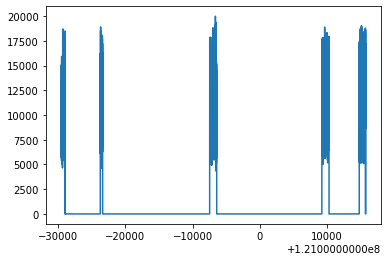

In [6]:
lc.plot()

In [7]:
def meanseg(lc):
    return np.mean(lc.countrate)

In [8]:
n_sec = 64.0
start, stop, meanrate = lc.analyze_lc_chunks(segment_size=n_sec, func=meanseg)

In [9]:
print(len(start))

58


In [10]:
print(meanrate)

[20475.609375 19413.4375   18689.296875 27340.09375  24733.015625
 26059.1875   20960.8125   25592.21875  23410.96875  22394.9375
 22139.90625  18591.171875 22262.765625 22653.484375 23179.046875
 22862.875    18152.53125  19808.796875 20556.875    20799.59375
 24470.046875 25372.578125 22392.21875  22717.40625  19939.953125
 24973.765625 27063.515625 18019.234375 23468.1875   22779.15625
 20481.1875   19578.5625   21794.71875  22825.859375 24385.71875
 21250.765625 21443.953125 25281.234375 25065.015625 26182.53125
 24384.8125   19999.296875 22465.578125 23426.453125 20736.5625
 24375.390625 23577.8125   26278.75     26626.140625 28117.6875
 22389.234375 20959.984375 18941.       24821.03125  22783.671875
 23539.859375 23135.640625 24372.28125 ]


In [11]:
print(stop-start)
print(start[1]-start[0])

[64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5
 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5
 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5
 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5 64.5
 64.5 64.5]
64.0


In [12]:
ends = stop-lc.dt
print(np.mean(ends-start))

64.0


If you want to save your segment starts and ends to a text file, uncomment the next block.

In [13]:
# seg_times = np.column_stack((start, ends))
# gti_txt = exe_dir+"/out/%s_%dsec_%ddt_seg-times.txt" % (obj_prefix, n_sec, int(1/lc.dt))
# np.savetxt(gti_txt, seg_times, fmt="%.12f")

Run this at the command line to get a hollow husk of a GTI file 

In [16]:
print("Run these things at the command line:")
print("bash")
print("heainit")
print("cd %s" % data_dir)
print("nimaketime infile=../../auxil/ni1050390113.mkf outfile=./obs113_nobary.gti")

Run these things at the command line:
bash
heainit
cd /home/astevens/Reduced_data/Swift_J0243.6+6124/1050390113/xti/event_cl/
nimaketime infile=../../auxil/ni1050390113.mkf outfile=./obs113_nobary.gti


In [17]:
gti_file = data_dir+'obs113_nobary.gti'
assert os.path.isfile(gti_file), 'GTI file does not exist.'

In [18]:
gti2 = Table.read(gti_file, format='fits')
print(gti2)

   START        STOP   
    sec         sec    
----------- -----------
120970497.0 120971065.0
120971070.0 120971082.0
120976288.0 120976642.0
120992530.0 120992531.0
120992533.0 120993582.0
121009194.0 121010262.0
121014748.0 121015685.0
121015688.0 121015701.0


In [19]:
final_tab = Table()
final_tab.meta = gti2.meta

In [20]:
final_tab['START'] = start
final_tab['STOP'] = ends

In [21]:
final_tab.write(gti_file, format='fits', overwrite=True)

niextract-events filename=./1050390113/xti/event_cl/obs113_0mpu7_cl_no14-34-54.evt[PI=20:1200,EVENT_FLAGS=bxxx1x000] eventsout=./obs1050390113_filt-nobary-extr.evt timefile=./1050390113/xti/event_cl/obs113_nobary.gti gti=GTI clobber=YES chatter=5

niextract-events filename=./1050390113/xti/event_cl/obs113_CI_cl_no14-34-54.evt[PI=20:1200,EVENT_FLAGS=bxxx1x000] eventsout=./113_CI_filt-nobary-extr.evt timefile=./1050390113/xti/event_cl/obs113_nobary.gti gti=GTI clobber=YES chatter=5